Factors that Affect Insurance Charges
===

Quick inspection of data

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving insurance_regression.csv to insurance_regression.csv


{'insurance_regression.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance_regression.csv')
df = df.dropna()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## SMOKING

In [ ]:
smoker_type = df[["charges","smoker"]].groupby("smoker").mean().sort_values("charges",ascending=False)
smoker_type

,charges
smoker,
yes,32050.231832
no,8434.268298


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


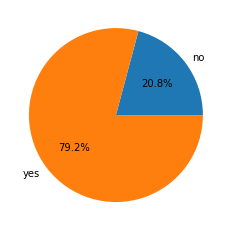

In [ ]:
smoker_type = df[["charges","smoker"]].groupby("smoker").mean()
smoker_labels = smoker_type.sort_values("charges").index 
charges = smoker_type.sort_values("charges")
plt.pie(charges, labels = smoker_labels, autopct='%1.1f%%')
plt.show()

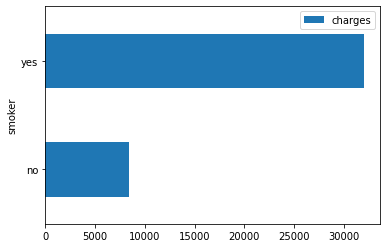

In [152]:
df[["charges","smoker"]].groupby("smoker").mean().sort_values("charges",ascending=True).plot.barh()

## NUMBER OF CHILDREN

In [ ]:
df[["charges","children"]].groupby("children").mean().sort_values("charges",ascending=False)

,charges
children,
3,15355.318367
2,15073.563734
4,13850.656311
1,12731.171832
0,12365.975602
5,8786.035247


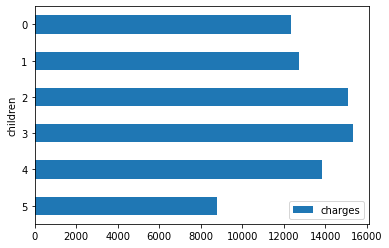

In [ ]:
# NUMBER OF CHILDREN to AVERAGE CHARGES
df[["charges","children"]].groupby("children").mean().sort_values("children",ascending=False).plot.barh()

## BMI

In [ ]:
bmi_class = [(df["bmi"]< 18.5),
             (df["bmi"]>= 18.5) & (df["bmi"] < 25),
             (df["bmi"]>= 25) & (df["bmi"] < 30),
             (df["bmi"]>= 30)]
bmi_title = ["underweight","normal","overweight","obese"]
df["class"] = np.select(bmi_class,bmi_title)
df

,age,sex,bmi,children,smoker,region,charges,class
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [ ]:
df[["charges","class"]].groupby("class").mean().sort_values("charges",ascending=False)

,charges
class,
obese,15552.335469
overweight,10987.509891
normal,10409.337709
underweight,8852.200585


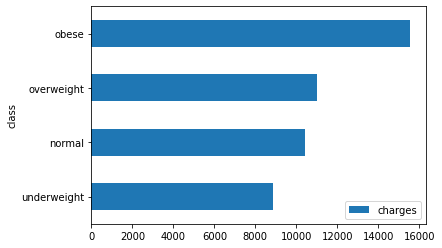

In [ ]:
df[["charges","class"]].groupby("class").mean().sort_values("charges",ascending=True).plot.barh()

## AGE

In [ ]:
age_class = [(df["age"]<= 25),
             (df["age"]>= 26) & (df["age"]<= 35),
             (df["age"]>= 36) & (df["age"]<= 45),
             (df["age"]>= 46) & (df["age"]<= 55),
             (df["age"]>= 56)]
age_title = ["25 and below","26-35","36-45","46-55","55 and above"]
df["age_group"] = np.select(age_class, age_title)
df

,age,sex,bmi,children,smoker,region,charges,class,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,25 and below
1,18,male,33.770,1,no,southeast,1725.55230,obese,25 and below
2,28,male,33.000,3,no,southeast,4449.46200,obese,26-35
3,33,male,22.705,0,no,northwest,21984.47061,normal,26-35
4,32,male,28.880,0,no,northwest,3866.85520,overweight,26-35
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese,46-55
1334,18,female,31.920,0,no,northeast,2205.98080,obese,25 and below
1335,18,female,36.850,0,no,southeast,1629.83350,obese,25 and below
1336,21,female,25.800,0,no,southwest,2007.94500,overweight,25 and below


In [ ]:
df[["charges","age_group"]].groupby("age_group").mean().sort_values("age_group",ascending=True)

,charges
age_group,
25 and below,9087.015807
26-35,10495.163047
36-45,13493.485247
46-55,15986.900310
55 and above,18795.993816


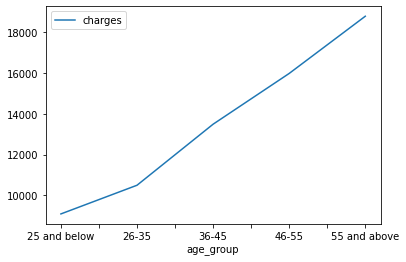

In [ ]:
df[["charges","age_group"]].groupby("age_group").mean().sort_values("age_group",ascending=True).plot.line()

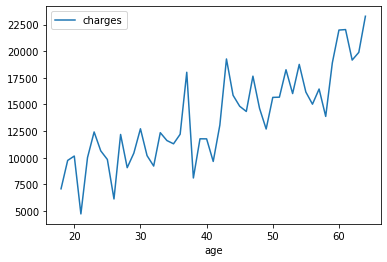

In [153]:
df[["charges","age"]].groupby("age").mean().sort_values("age",ascending=True).plot.line()

## REGION

In [ ]:
df[["charges","region"]].groupby("region").mean().sort_values("charges",ascending=False)

,charges
region,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


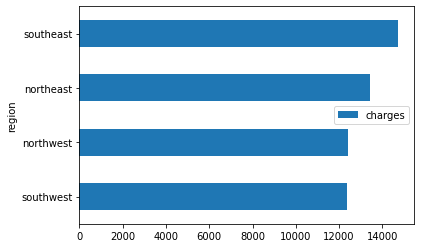

In [ ]:
df[["charges","region"]].groupby("region").mean().sort_values("charges",ascending=True).plot.barh()

## SEX

In [ ]:
sex_type = df[["charges","sex"]].groupby("sex").mean().sort_values("charges",ascending=False)
sex_type

,charges
sex,
male,13956.751178
female,12569.578844


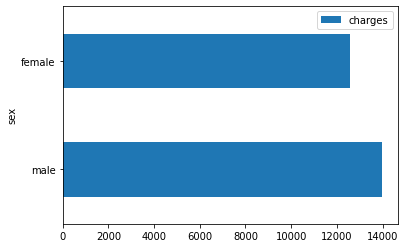

In [158]:
df[["charges","sex"]].groupby("sex").mean().sort_values("charges",ascending=False).plot.barh()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


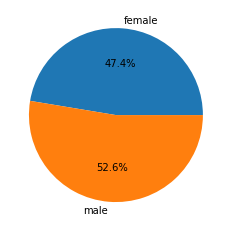

In [ ]:
sex_labels = sex_type.sort_values("charges").index 
charges = sex_type.sort_values("charges")
plt.pie(charges, labels = sex_labels, autopct='%1.1f%%')
plt.show()

## Correlation of SMOKING and SEX

In [ ]:
smoker_sex = df.groupby(["smoker","sex"]).agg("count")["age"]
smoker_sex

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

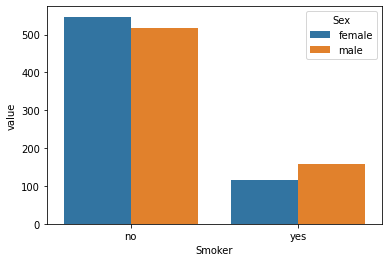

In [ ]:
 smoker_list = list(df["smoker"])
 sex_list = list(df["sex"])
 df1 = pd.DataFrame({"Smoker":smoker_list, "Sex":sex_list})
 ct = pd.crosstab(df1.Smoker, df1.Sex)

 stacked = ct.stack().reset_index().rename(columns={0:'value'})
 sns.barplot(x=stacked.Smoker, y=stacked.value, hue=stacked.Sex)